# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [125]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

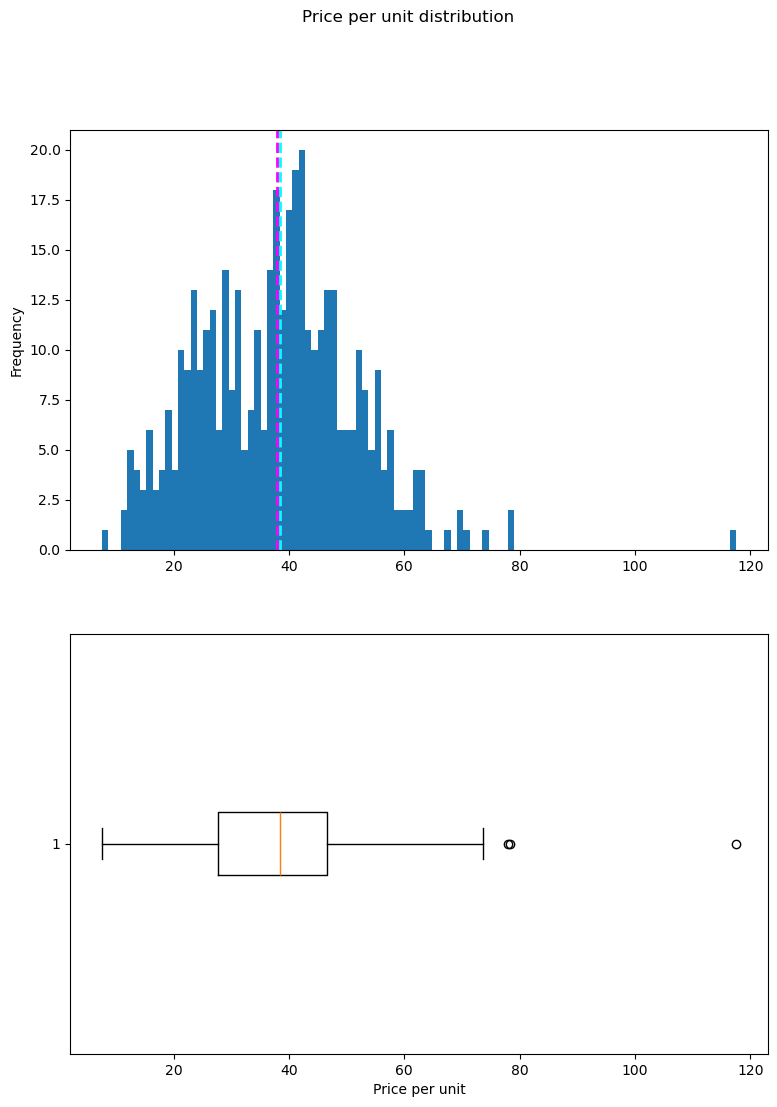

In [126]:
# Your code to explore data and train a regression model
import math
import matplotlib.pyplot as plt
data['tx_month'] = data.apply(lambda row: round(math.modf(row['transaction_date'])[0] * 12), axis=1)
data['tx_year'] = data.apply(lambda row: round(math.modf(row['transaction_date'])[1]), axis=1)

data.head(5)

numeric_features = list(filter(lambda columnName: columnName != 'price_per_unit' and columnName != 'transaction_date' and columnName != 'local_convenience_stores', 
                               data.columns))
categorical_features = data[['transaction_date', 'local_convenience_stores']]
label = data['price_per_unit']

fig, ax = plt.subplots(2, 1, figsize=(9,12))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle = 'dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle = 'dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per unit')

fig.suptitle('Price per unit distribution')

plt.show()




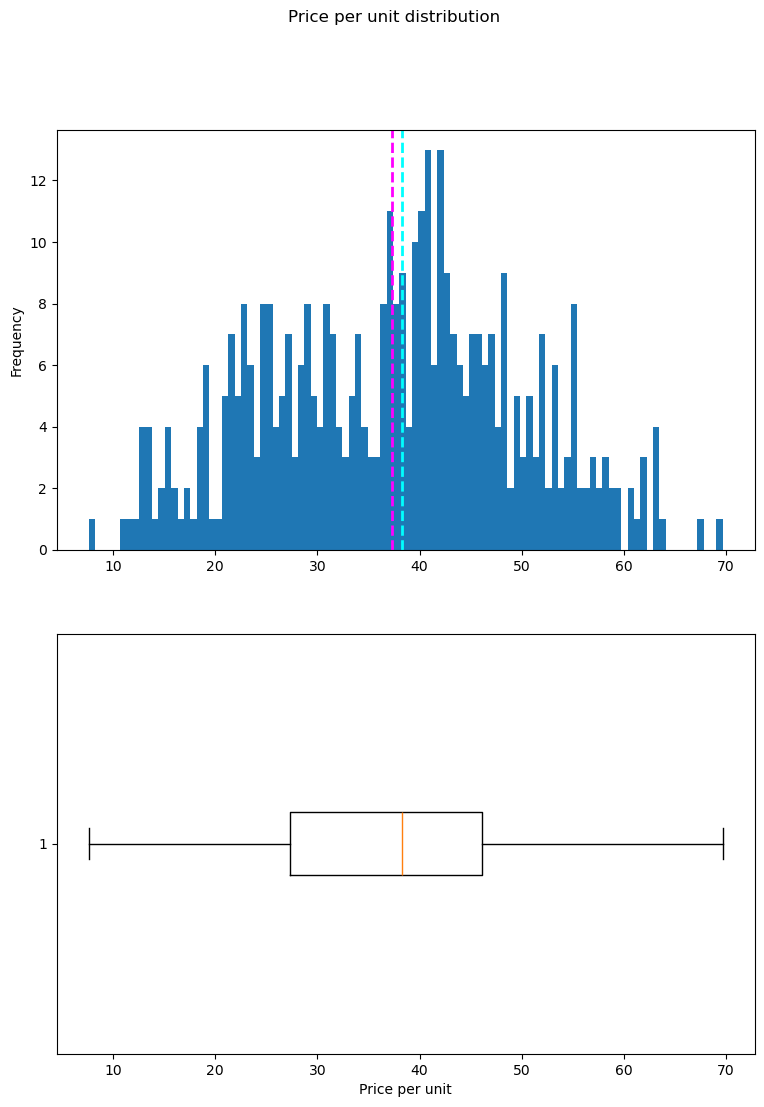

In [127]:
data = data[data['price_per_unit'] < 70]
label = data['price_per_unit']

fig, ax = plt.subplots(2, 1, figsize=(9,12))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle = 'dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle = 'dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per unit')

fig.suptitle('Price per unit distribution')

plt.show()

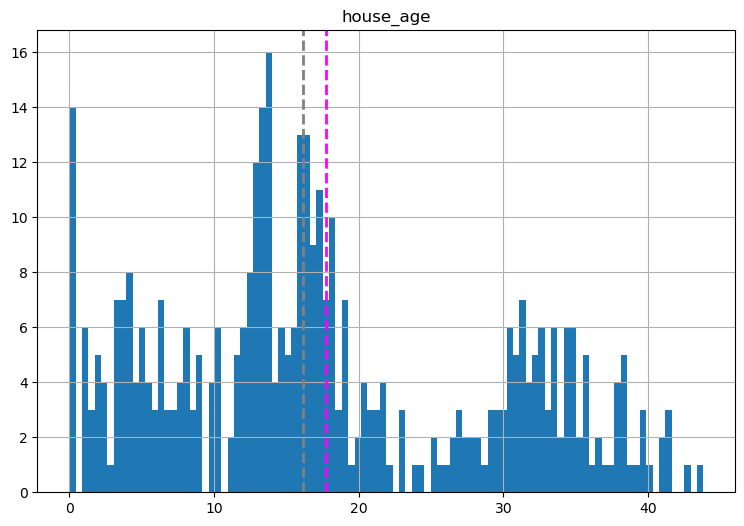

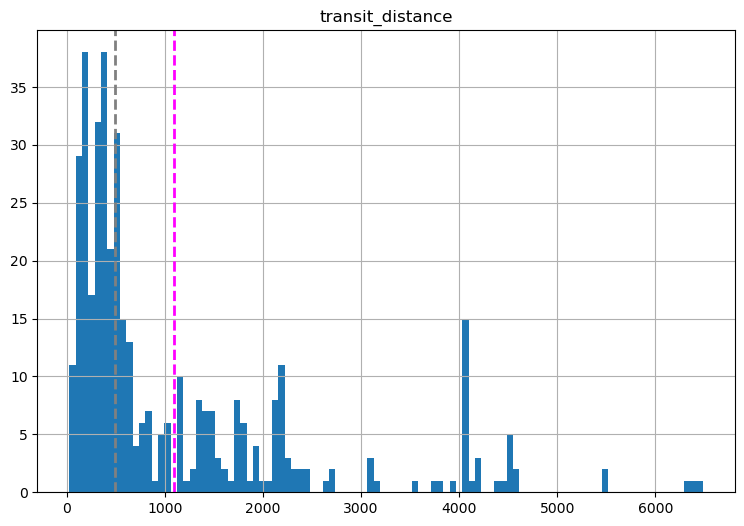

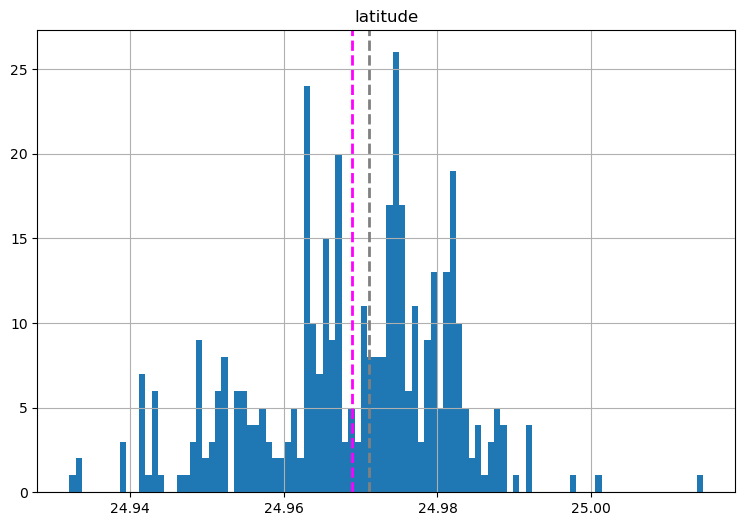

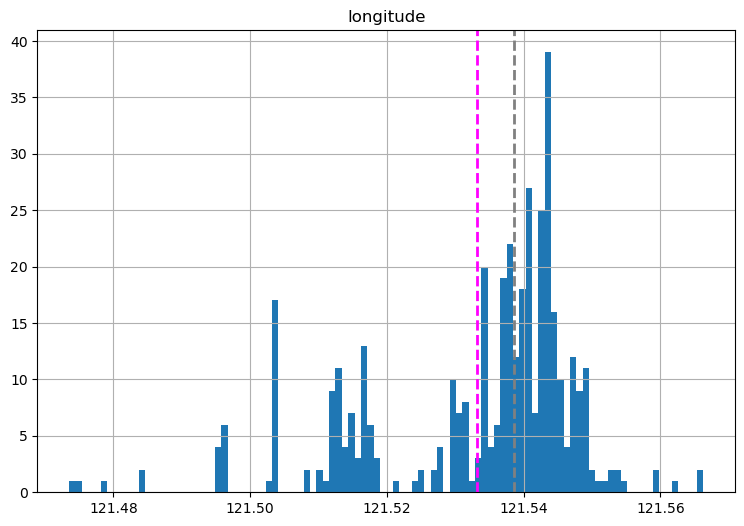

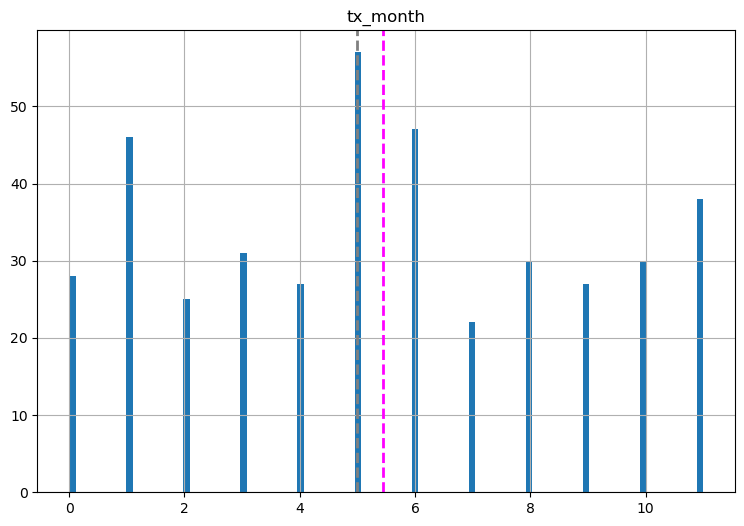

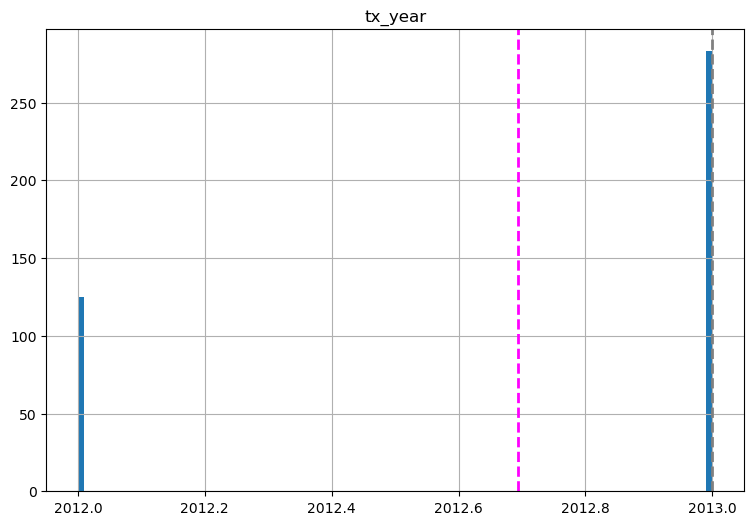

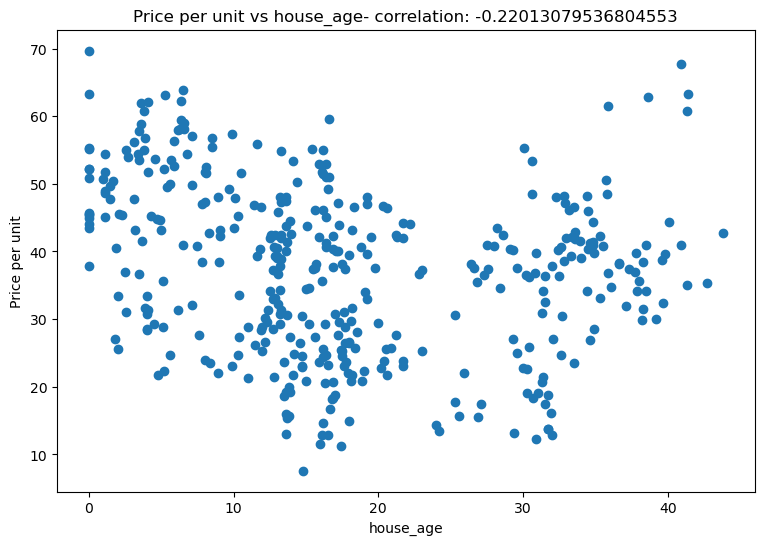

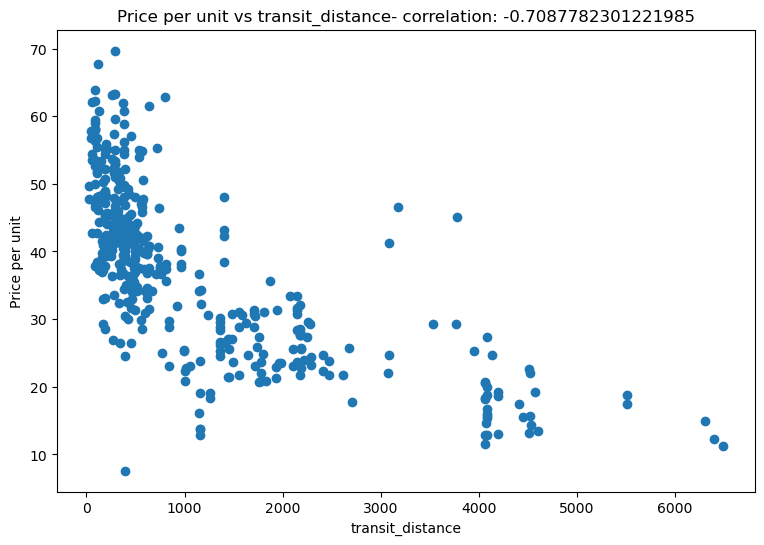

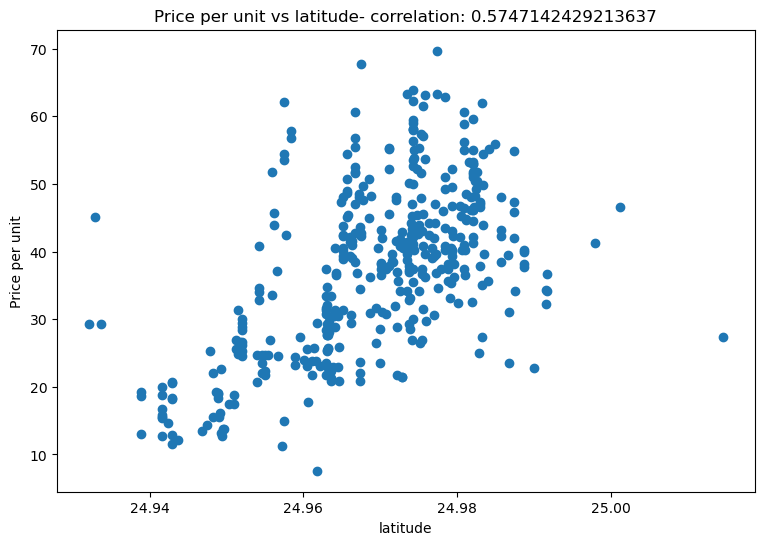

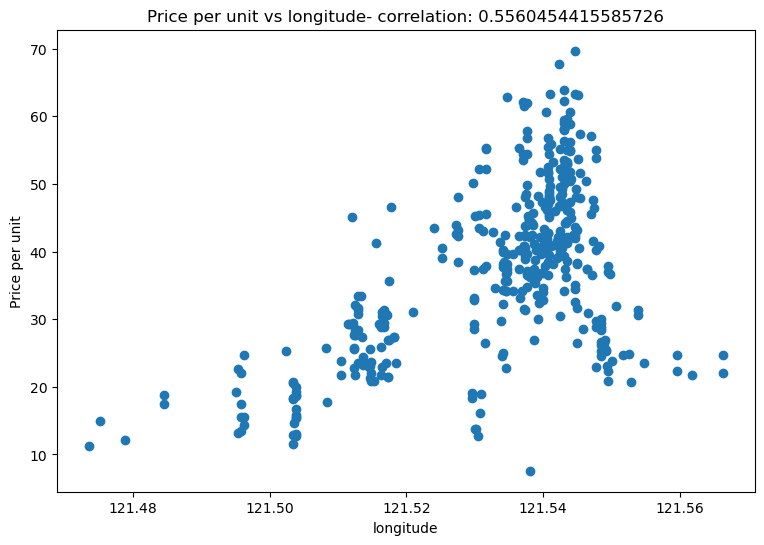

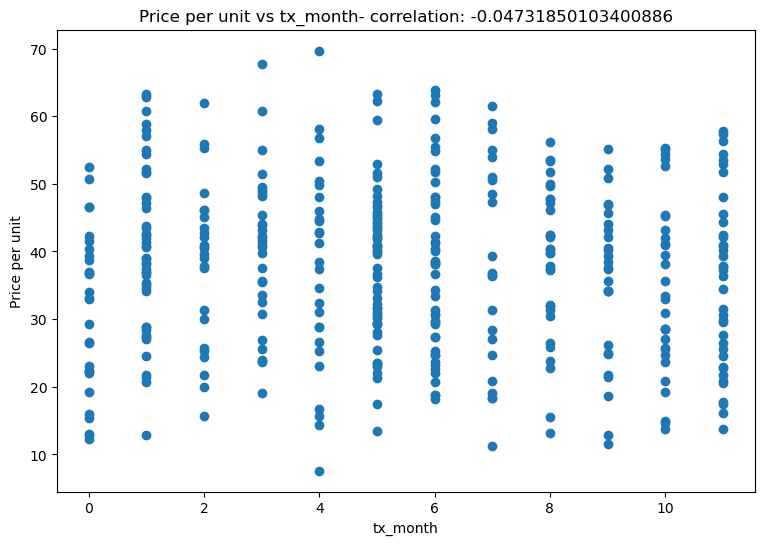

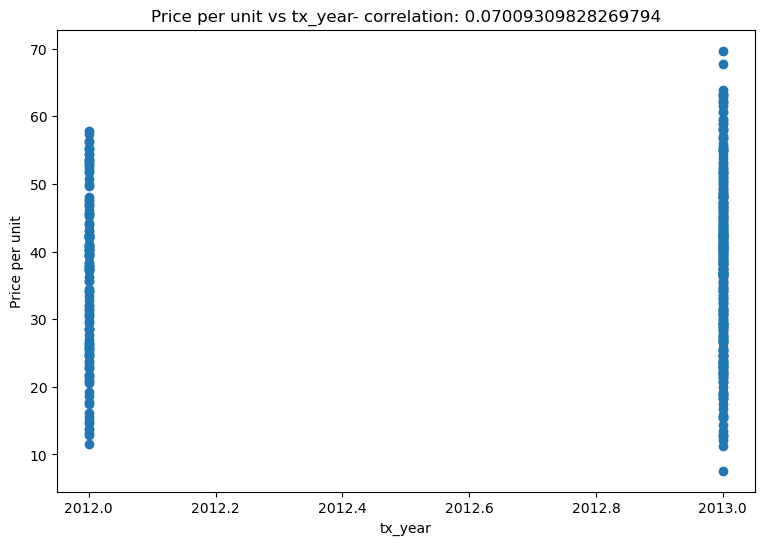

In [128]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins = 100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth = 2)
    ax.axvline(feature.median(), color='gray', linestyle='dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

# Plot correlation of 
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per unit')
    ax.set_title('Price per unit vs ' + col + '- correlation: ' + str(correlation))
plt.show()

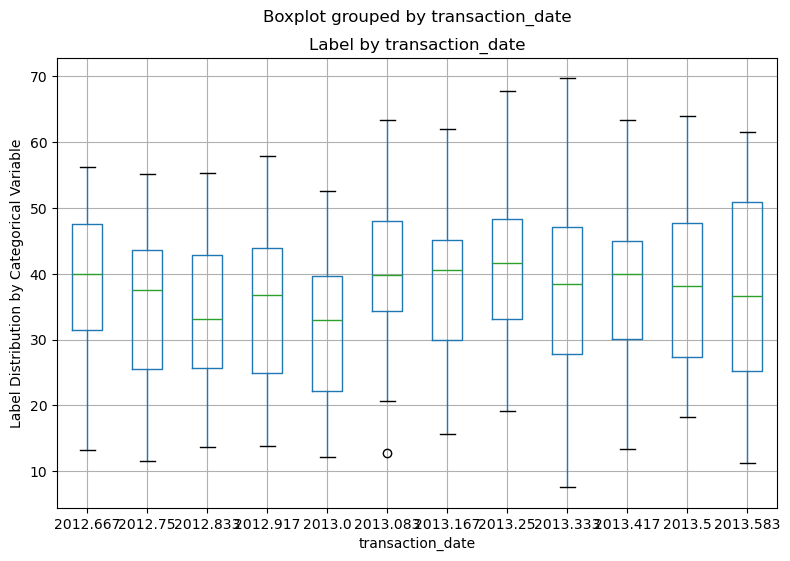

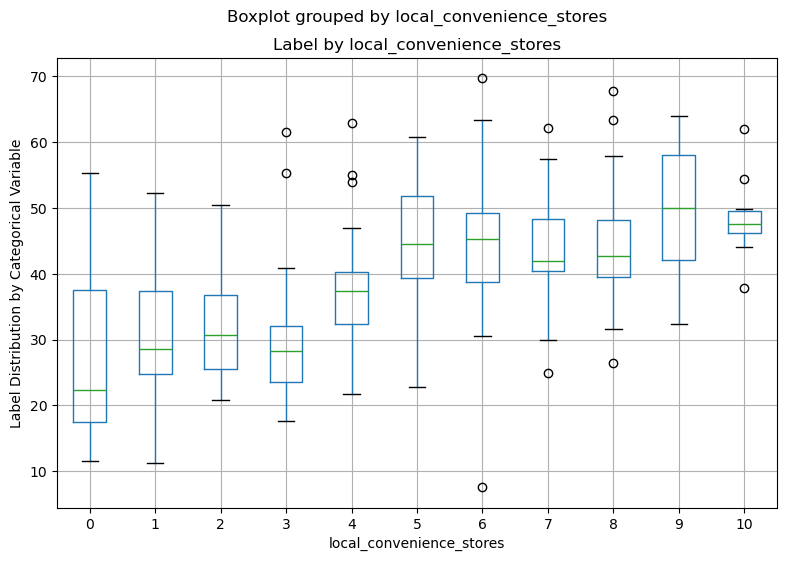

In [129]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [130]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[data.columns[1:-1]].values, data[data.columns[-3]].values
print(X)
print(y)

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

[[ 32.       84.87882  10.      ... 121.54024  37.9      11.     ]
 [ 19.5     306.5947    9.      ... 121.53951  42.2      11.     ]
 [ 13.3     561.9845    5.      ... 121.54391  47.3       7.     ]
 ...
 [ 18.8     390.9696    7.      ... 121.53986  40.6       3.     ]
 [  8.1     104.8101    5.      ... 121.54067  52.5       0.     ]
 [  6.5      90.45606   9.      ... 121.5431   63.9       6.     ]]
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1 41.4 58.1 39.3 23.8
 34.3 50.5 37.4 42.3 47.7 29.3 51.6 24.6 47.9 38.8 27.  56.2 33.6 47.
 57.1 22.1 25.  34.2 49.3 55.1 27.3 22.9 25.3 47.7 46.2 15.9 18.2 34.7
 34.1 53.9 38.3 42.  61.5 13.4 13.2 44.2 20.7 27.  38.9 51.7 13.7 41.9
 53.5 22.6 42.4 21.3 63.2 27.7 55.  25.3 44.3 50.7 56.8 36.2 42.  59.
 40.8 36.3 20.  54.4 29.5 36.8 25.6 29.8 26.5 40.3 36.8 48.1 17.7 43.7
 50.8 27.  18.3 48.  25.3 45.4 43.2 21.8 16.1 41.  51.8 59.5 34.6 51.
 62.2 38.2 32.9 54.4 45.7 30.5 47.1 26.6 34.1 28.4 51.6 39.4 23.1  7.6
 53.3 46.4 12.2 13.  30.6 5

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

numeric_feature_indices = [0, 1, 3, 4]
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature_indices)
    ]
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

model = pipeline.fit(X_train, (y_train))

print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


In [132]:
# Use the model to predict

import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

predictions = model.predict(X_test)
print(predictions)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ', y_test[:10])


[45.191      35.301      49.11961905 51.96766667 45.05565    35.423
 41.801      22.631      53.48133333 41.685      50.55225    49.38833333
 25.56178571 34.40925    40.498      38.668      44.0677     41.031
 35.372      24.081      44.1784     25.638      48.0077123  37.903
 25.673      45.34128333 50.55225    16.42433333 37.10216667 27.76675
 23.951      43.68575    36.496      42.354      45.895      38.2085
 57.62726667 26.206      25.673      25.062      40.117      44.837
 16.022      24.967      40.561      45.67175    41.337      25.695
 14.433      55.207      27.672      42.732      57.46960714 27.9805
 29.26003571 36.572      46.75875    34.8908     39.9049     40.877
 30.082      35.015      35.499      43.734      39.1195     40.218
 50.9045     38.0236     50.72633333 37.238      43.241      27.746
 40.799      33.421      49.6165     48.21875    47.71116667 47.11425
 47.65216667 18.342      33.061      48.85625    28.63053571 40.27
 45.5225     47.148      58.0915     3

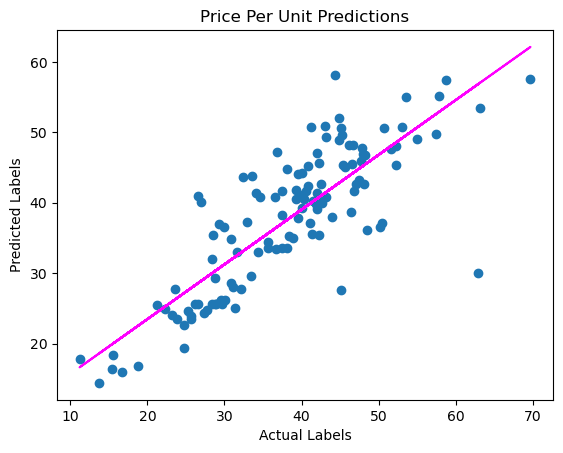

MSE: 38.75698362890282
RMSE: 6.225510712295243
R2: 0.669284908072628
Predictions
49.12
16.42


In [133]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


X_test = np.array([
            [16.2, 289.3248,5,24.98203,121.54348, 2, 2013],
            [13.6, 4082.015,0,24.94155,121.50381, 0, 2013]
 ])


predictions = model.predict(X_test)
print("Predictions")
for prediction in predictions:
    print(round(prediction, 2))
